<a href="https://colab.research.google.com/github/DzakySalman/AS_Cuaca_212102402/blob/main/212102402_Muhammad_Dzaky_Salman_Bike_Buyer_Web_Application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deploy Model into a Web Application
## Tugas Data Science Minggu 5 - Dataset Bike Buyer

### Nama  : Muhammad Dzaky Salman
### NIM     : 212102402
### Prodi / Kelas : TI - 7C1

# Overview of Machine Learning

Machine learning is a branch of artificial intelligence that empowers computers to learn from data and make decisions or predictions without being explicitly programmed. It's like teaching a computer to recognize patterns and make decisions based on examples. At its core, machine learning involves algorithms that iteratively learn from data, uncovering hidden insights and making predictions or decisions.

# The Problem

**Case Study:**
Standardizing Timber Product Pricing for a Forestry Company

**Background:**
You have recently joined a Forestry company as a Forest Product Officer. The company faces a significant challenge in establishing a standardized method for pricing its timber products. This inconsistency in pricing has led to confusion and inefficiencies within the company's operations.

**Objective:**
Your task is to develop a comprehensive strategy to address the pricing inconsistency issue and establish a standardized pricing framework for the company's timber products.

# Load the Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load the data

data = pd.read_csv('/content/drive/MyDrive/bike_buyers_clean.csv')
# data = pd.read_csv('https://raw.githubusercontent.com/meshachaderele/timber-price/main/timber_price_data.csv')
print(data)

        ID Marital Status  Gender  Income  Children        Education  \
0    12496        Married  Female   40000         1        Bachelors   
1    24107        Married    Male   30000         3  Partial College   
2    14177        Married    Male   80000         5  Partial College   
3    24381         Single    Male   70000         0        Bachelors   
4    25597         Single    Male   30000         0        Bachelors   
..     ...            ...     ...     ...       ...              ...   
995  23731        Married    Male   60000         2      High School   
996  28672         Single    Male   70000         4  Graduate Degree   
997  11809        Married    Male   60000         2        Bachelors   
998  19664         Single    Male  100000         3        Bachelors   
999  12121         Single    Male   60000         3      High School   

         Occupation Home Owner  Cars Commute Distance         Region  Age  \
0    Skilled Manual        Yes     0        0-1 Miles     

# Explore the Data

In [ ]:
# Exploratory Data Analysis
data.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


In [ ]:
data.describe()

,ID,Income,Children,Cars,Age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,19965.992000,56140.000000,1.908000,1.452000,44.190000
std,5347.333948,31081.609779,1.626094,1.124705,11.353537
min,11000.000000,10000.000000,0.000000,0.000000,25.000000
25%,15290.750000,30000.000000,0.000000,1.000000,35.000000
50%,19744.000000,60000.000000,2.000000,1.000000,43.000000
75%,24470.750000,70000.000000,3.000000,2.000000,52.000000
max,29447.000000,170000.000000,5.000000,4.000000,89.000000


In [ ]:
data.isna().any()

,0
ID,False
Marital Status,False
Gender,False
Income,False
Children,False
Education,False
Occupation,False
Home Owner,False
Cars,False
Commute Distance,False


In [ ]:
data.columns

Index(['ID', 'Marital Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age',
       'Purchased Bike'],
      dtype='object')

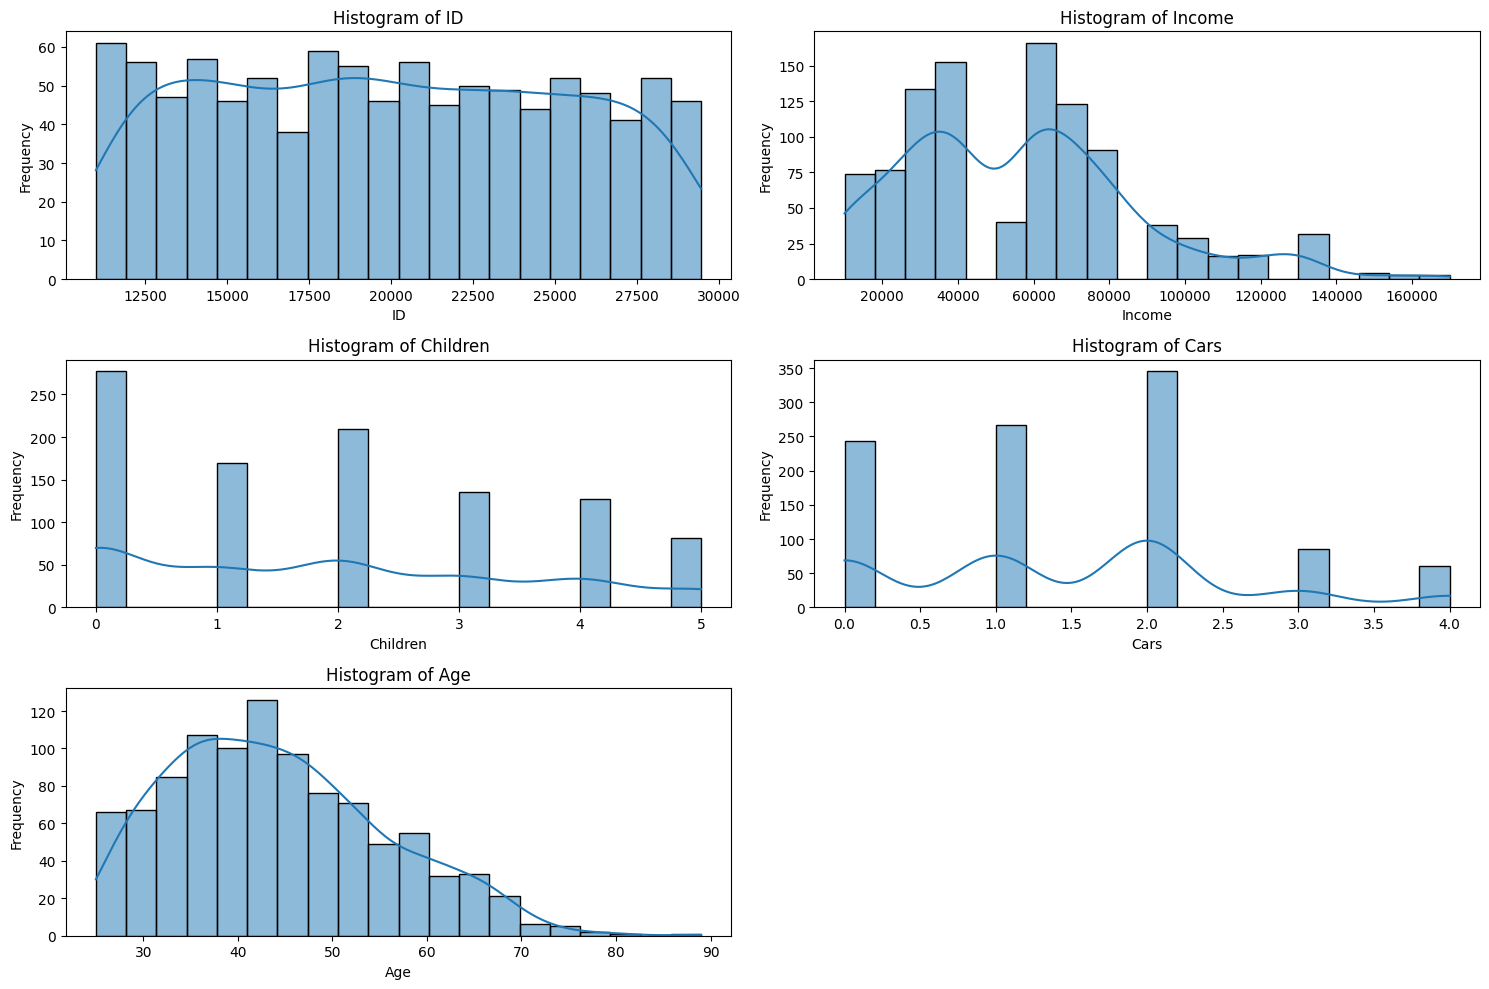

In [ ]:
import seaborn as sns

variables = ['ID', 'Income', 'Children', 'Cars', 'Age']

# Plot histograms for each variable
plt.figure(figsize=(15, 10))
for i, var in enumerate(variables, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[var], bins=20, kde=True)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

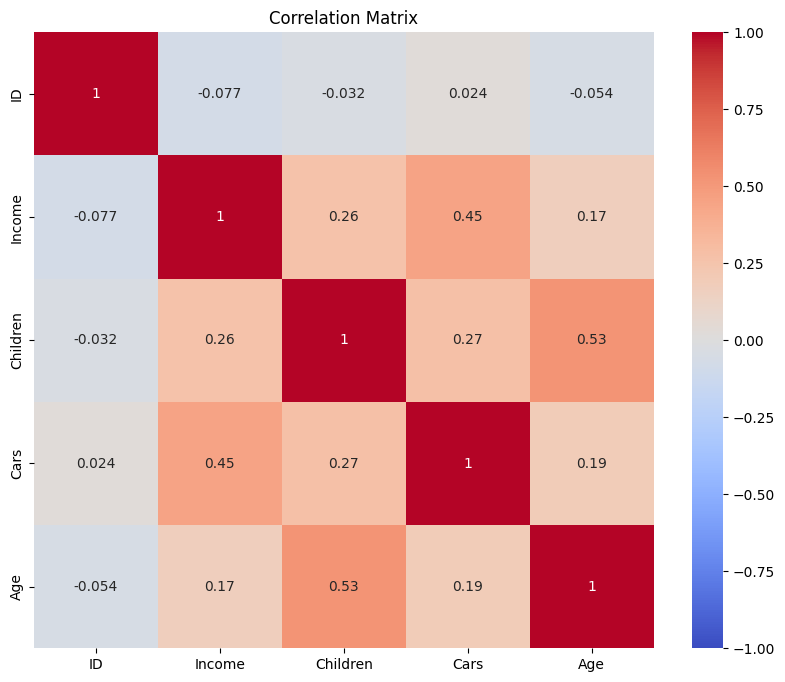

In [ ]:
# Check for correlation

import matplotlib.pyplot as plt

correlation_matrix = data.drop(['Marital Status', 'Gender', 'Education', 'Occupation', 'Home Owner', 'Commute Distance', 'Region', 'Purchased Bike'], axis = 1).corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Data Preprocessing for Modeling

In [ ]:

# Splitting data into features (X) and target variable (y)
X = data[['Marital Status', 'Gender', 'Income', 'Children', 'Education', 'Occupation', 'Home Owner',
          'Cars', 'Commute Distance', 'Region', 'Age']]
y = data['Purchased Bike']



In [ ]:
# Encoding categorical variables

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Categorical features to be one-hot encoded
cat_features = ['Marital Status', 'Gender', 'Education', 'Occupation', 'Home Owner', 'Commute Distance', 'Region']

# Preprocessing pipeline for categorical features
cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing for all features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', cat_transformer, cat_features)
    ], remainder='passthrough'
)



In [ ]:
from sklearn.model_selection import train_test_split
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Model Training and Testing

In [ ]:
# Load libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

# Model Training
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Create a LabelEncoder to convert 'Yes' and 'No' to 0 and 1
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train) # Encode y_train

# Create a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', rf_model)
])
pipeline.fit(X_train, y_train_encoded) # Fit with encoded y_train

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Marital Status', 'Gender',
                                                   'Education', 'Occupation',
                                                   'Home Owner',
                                                   'Commute Distance',
                                                   'Region'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [ ]:
# Model Evaluation
y_pred = pipeline.predict(X_test)

# Keep y_pred as numeric for MSE calculation
# y_pred_original = label_encoder.inverse_transform(y_pred.astype(int)) # Remove this line

# Calculate MSE using numeric predictions
mse = mean_squared_error(label_encoder.transform(y_test), y_pred) # Use encoded y_test

rmse = np.sqrt(mse)

# For R2, use the original or encoded values, ensuring consistency
# r2 = r2_score(y_test, label_encoder.inverse_transform(y_pred.astype(int)))
# or
r2 = r2_score(label_encoder.transform(y_test), y_pred)


print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Mean Squared Error (MSE): 0.1929505257653061
Root Mean Squared Error (RMSE): 0.43926134107761644
R² Score: 0.225409370673199


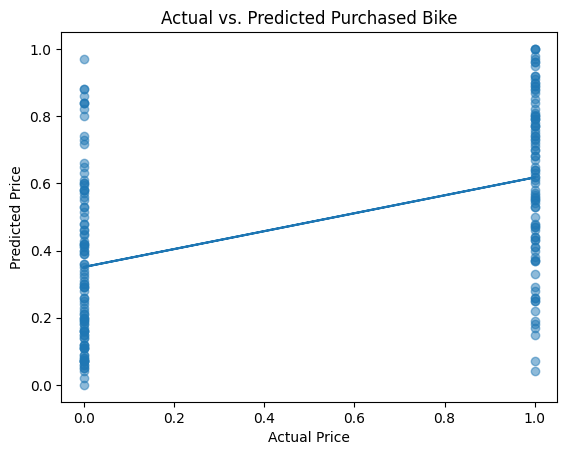

In [ ]:
# Visualize predicted vs. actual price
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# Ensure y_test and y_pred are numeric
y_test_numeric = label_encoder.transform(y_test)  # Convert y_test to numeric if it's not
y_pred_numeric = y_pred.astype(float)  # Convert y_pred to numeric if it's not

plt.scatter(y_test_numeric, y_pred_numeric, alpha=0.5)

slope, intercept, rvalue, pvalue, stderr = stats.linregress(y_test_numeric, y_pred_numeric)

plt.plot(y_test_numeric, slope * y_test_numeric + intercept)

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Purchased Bike")
plt.show()

# Make Predictions With the Trained Model

In [ ]:

pred_data = pd.read_csv('/content/drive/MyDrive/bike_buyers_clean.csv')
# pred_data = pd.read_csv('https://raw.githubusercontent.com/meshachaderele/timber-price/main/timber_price_data.csv')


In [ ]:
pred_data.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


In [ ]:
# Make the prediction
purchased_bike_predict = pipeline.predict(pred_data)

In [ ]:
#Join the prediction to table
pred_data['Purchased Bike'] = purchased_bike_predict
pred_data.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,0.07
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,0.22
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,0.16
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,0.81
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,1.00


# Deploy Model into a Web Application

In [ ]:
import joblib

# Save the pipeline model
joblib.dump(pipeline, 'purchased_bike_model.joblib')

['purchased_bike_model.joblib']

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 1.6 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Load the trained model
model = joblib.load('purchased_bike_model.joblib')

def predict_price(features):
    # Convert input dictionary to DataFrame
    input_data = pd.DataFrame([features])
    # Make prediction
    prediction = model.predict(input_data)
    return prediction[0]

def main():
    st.title('Purchased Bike Prediction App')
    st.write('Enter the following details to predict Purchased Bike:')

    # Input fields for user data
    marital_status = st.selectbox('Marital Status', ['Married', 'Single'])
    gender = st.selectbox('Gender', ['Male', 'Female'])
    income = st.number_input('Income', min_value=0, step=1000)
    children = st.number_input('Children', min_value=0, step=1)
    education = st.selectbox('Education', ['Partial High School', 'High School', 'Partial College', 'Bachelors', 'Graduate Degree'])
    occupation = st.selectbox('Occupation', ['Professional', 'Skilled Manual', 'Clerical', 'Management', 'Manual'])
    home_owner = st.selectbox('Home Owner', ['Yes', 'No'])
    cars = st.number_input('Cars', min_value=0, step=1)
    commute_distance = st.selectbox('Commute Distance', ['0-1 Miles', '1-2 Miles', '2-5 Miles', '5-10 Miles', '10+ Miles'])
    region = st.selectbox('Region', ['Europe', 'North America', 'Pacific'])
    age = st.number_input('Age', min_value=18, step=1)

    # Create a dictionary from user inputs
    features = {
        'Marital Status': marital_status,
        'Gender': gender,
        'Income': income,
        'Children': children,
        'Education': education,
        'Occupation': occupation,
        'Home Owner': home_owner,
        'Cars': cars,
        'Commute Distance': commute_distance,
        'Region': region,
        'Age': age
    }

    # Predict Purchased Bike
    if st.button('Predict'):
        prediction = predict_price(features)
        # Assuming the model predicts 0 or 1, convert to 'No' or 'Yes'
        predicted_purchase = 'Yes' if prediction == 1 else 'No'
        st.success(f'Predicted Purchased Bike: {predicted_purchase}')

if __name__ == '__main__':
    main()

Writing app.py


In [ ]:
! streamlit run app.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.173.227.61:8501

